IN THIS FILE, WE WILL BE BUILDING THE RECOMMENDATION SYSTEM THAT WILL SHOW THE TOP 5 PRODUCTS THAT ARE USUALLY BOUGHT ALONGSIDE A CERTAIN PRODUCT.

In [2]:
# Importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

1. Loading the saved cleaned dataset.

In [3]:
df = pd.read_csv('../data/cleaned_online_retail.csv')

# Checking the shape of the dataframe
print(df.shape)

# Checking few rows of the dataframe
print(df.sample(7))

(392692, 10)
        InvoiceNo StockCode                       Description  Quantity  \
184628     560366     21829        DINOSAUR KEYRINGS ASSORTED        36   
332323     575701     79321                     CHILLI LIGHTS        24   
325351     574947     21790                VINTAGE SNAP CARDS        12   
73760      546107     22264     FELT FARM ANIMAL WHITE BUNNY          2   
26784      540168     20961           STRAWBERRY BATH SPONGE          6   
214521     563858     21733  RED HANGING HEART T-LIGHT HOLDER         6   
225798     565292    72351B    SET/6 PINK  BUTTERFLY T-LIGHTS        12   

                InvoiceDate  UnitPrice  CustomerID         Country  \
184628  2023-07-18 12:19:00       0.21       16859  United Kingdom   
332323  2023-10-11 16:59:00       4.95       13396  United Kingdom   
325351  2023-08-11 09:03:00       0.85       16422  United Kingdom   
73760   2023-09-03 12:33:00       0.85       17238  United Kingdom   
26784   2023-05-01 12:15:00       1.

In [4]:
# Re-checking for null values
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalAmount     0
InvoiceMonth    0
dtype: int64

In [5]:
# Standardising the product descriptions
df['Description'] = df['Description'].str.strip().str.lower()

2. Creating the Customer-Product matrix. For this, we will use total quantity of a product purchased by a customer as the "interaction value".

    We are creating this matrix so that later if we want to also create a customer based collaborative filtering, besides the item based collaborative matrix, we can do that by using this matrix and computing the Cosine Similarity for it.

In [6]:
# Building the matrix (pivot table)
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0)

In [7]:
# Checking the shape of the customer-product matrix
customer_product_matrix.shape

(4338, 3866)

In [8]:
# Checking how the matrix looks like
customer_product_matrix.iloc[:5, :5]

Description,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted
CustomerID,,,,,
12346,0,0,0,0,0
12347,0,0,0,0,0
12348,0,0,0,0,0
12349,0,0,0,0,0
12350,0,0,0,0,0


3. Creating Product-Customer matrix. In the previous matrix that was created, the rows contained the CustomerID and the columns contained the Description of Products. In this matrix we will transpose the previous matrix such that we have Description of the products as rows and CustomerID as the columns. This will help us compute Cosine Similarity for item based collaborative filtering later.

In [9]:
# Transpose the Customer-Product Matrix
product_customer_matrix = customer_product_matrix.T

4. Now, we compute Cosine Similarity between products.

In [11]:
# Importing the library
from sklearn.metrics.pairwise import cosine_similarity

# Calculating the cosine similarity matrix
similarity_matrix = cosine_similarity(product_customer_matrix)

In [ ]:
# Creating a dataframe for the similarity matrix
product_similarity = pd.DataFrame(
    similarity_matrix,
    index=product_customer_matrix.index,
    columns=product_customer_matrix.index
)

In [ ]:
# Checking few rows of product_similarity dataframe
product_similarity.sample(7)

Description,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
Description,,,,,,,,,,,,,,,,,,,,,
card dolly girl,0.819506,0.006771,0.009071,0.011243,0.002425,0.006242,0.048378,0.700221,0.004903,0.001005,...,0.0,0.001864,0.004820,0.333231,0.0,0.506403,0.000000,0.792459,0.000000,0.003227
retro plastic 70's tray,0.009036,0.004561,0.001118,0.001068,0.000000,0.000883,0.000082,0.002657,0.005955,0.002325,...,0.0,0.000000,0.001166,0.001066,0.0,0.002173,0.002364,0.000071,0.000000,0.000000
i love london wall art,0.000000,0.098473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
potting shed candle citronella,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
charlie+lola pink hot water bottle,0.019841,0.041100,0.292462,0.429156,0.000000,0.001671,0.040827,0.069426,0.013863,0.003255,...,0.0,0.002419,0.064825,0.070767,0.0,0.050632,0.000000,0.051350,0.032269,0.178128
set/6 red spotty paper cups,0.053207,0.030149,0.011158,0.014994,0.000000,0.007570,0.207988,0.187303,0.436349,0.486710,...,0.0,0.000468,0.001994,0.021039,0.0,0.023055,0.000000,0.035868,0.000297,0.004421
set of 4 napkin charms cutlery,0.065049,0.007391,0.024681,0.038642,0.000000,0.045935,0.020683,0.006011,0.395881,0.677845,...,0.0,0.002367,0.051596,0.007499,0.0,0.005103,0.000000,0.024709,0.003349,0.013478


5. Defining a function that will help to provide the recommended products.

In [ ]:
def recommended_products(product_name, product_similarity, n=5):
    """
    This function takes a product name and returns the top 5 similar products
    based on cosine similarity.
    """
    product_name = product_name.strip().lower()

    if product_name not in product_similarity.index:
        return "Product not found in the database."
    
    # Get the similarity scores for the given product
    similarity_scores = product_similarity[product_name]
    
    # Sort the products based on similarity scores
    similar_products = similarity_scores.sort_values(ascending=False)
    
    # Exclude the input product itself and get the top 5 similar products
    top_similar_products = similar_products.iloc[1:n+1]
    
    return list(top_similar_products.index)

In [ ]:
# Testing the recommender system
recommended_products("FELTCRAFT PRINCESS CHARLOTTE DOLL", product_similarity)

['feltcraft princess lola doll',
 'feltcraft christmas fairy',
 'feltcraft princess olivia doll',
 '3 stripey mice feltcraft',
 'embroidered ribbon reel daisy']

6. Visualising the similarity scores of the top 10 most purchased products.

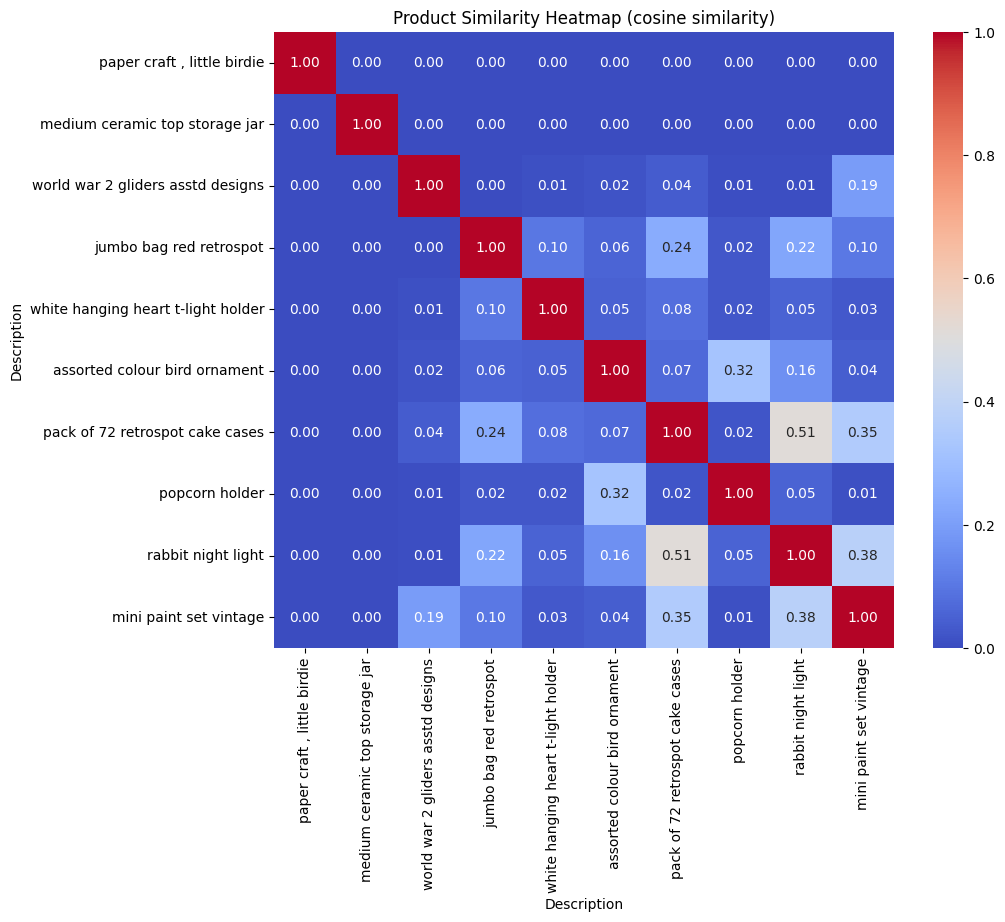

In [39]:
# Top 10 most purchased products
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).index.to_list()
similarity_subset = product_similarity.loc[top_10_products, top_10_products]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_subset, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Product Similarity Heatmap (cosine similarity)')
plt.show()

7. Saving the product_similarity dataframe and the product names list.

In [35]:
# Importing the library
import joblib

# Saving the product similarity dataframe
joblib.dump(product_similarity, '../data/artifacts_model/product_similarity.pkl')

# Saving the product list
joblib.dump(product_similarity.index.to_list(), '../data/artifacts_model/product_list.pkl')

['../data/artifacts_model/product_list.pkl']